## Get all imports

In [1]:
import math
import numpy as np
import pandas as pd
from collections import Counter
from PyImpetus import PPIMBC
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import time

## Load data

In [2]:
# Load the data into a dataframe
df = pd.read_csv("ionosphere.data", header=None)
# Pre-process the data
df[34] = df[34].str.replace("g", '1').replace("b", '0')
# Lets check it out
display(df.head())
# Split the data into input features and target variable
data, Y = df.drop([34], axis=1), df[34].values
# Lets check out the shape of our data
print("Data shape: ", data.shape, "Target Variable shape: ", Y.shape)

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


Data shape:  (351, 34) Target Variable shape:  (351,)


## Modelling with Decision Tree without PyImpetus

In [5]:
# We want to time our algorithm
start = time.time()
# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
# This will hold all the accuracy scores
scores = list()
# Perform CV
for train, test in kfold.split(data):
    # Split data into train and test based on folds
    x_train, x_test = data.iloc[train], data.iloc[test]
    y_train, y_test = Y[train], Y[test]
    
    # Convert the data into numpy arrays
    x_train, x_test = x_train.values, x_test.values
    
    model = DecisionTreeClassifier(random_state=27)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print("Score: ", score)
# Compute average score
print("\n\nAverage Accuracy: ", sum(scores)/len(scores))
# Finally, check out the total time taken
end = time.time()
print("\n\nTotal Time Required (in seconds): ", end-start)

Score:  0.9436619718309859
Score:  0.9142857142857143
Score:  0.8285714285714286
Score:  0.8428571428571429
Score:  0.8714285714285714


Average Accuracy:  0.8801609657947687


Total Time Required (in seconds):  0.03293204307556152


## Modelling with Decision Tree (fast but less robust feature subset selection)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using ba

Markov Blanket:  [12, 7, 6, 0, 4, 2]
Feature importance:  [3.018741228714776, 4.745727064875098, 17.88752950261862, 19.95248673645896, 18.414408750964604, 18.300223378228672]


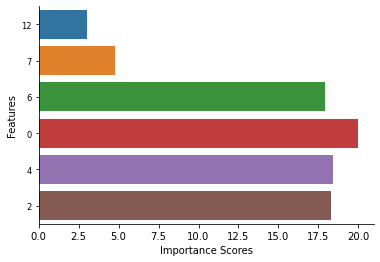

Score:  0.9014084507042254


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using ba

Markov Blanket:  [21, 7, 6, 0, 4, 2]
Feature importance:  [5.414693340936372, 3.3648015092066017, 7.504295317356582, 35.713997330274715, 21.82082382754651, 24.86336768732872]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


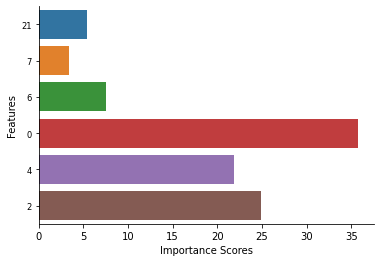

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Score:  0.9428571428571428


[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  50 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Usin

Markov Blanket:  [7, 20, 6, 0, 4, 2]
Feature importance:  [13.850917872090887, 3.1660680458993835, 3.4153679047173253, 29.461001442026323, 22.96077036370429, 19.535038946800007]


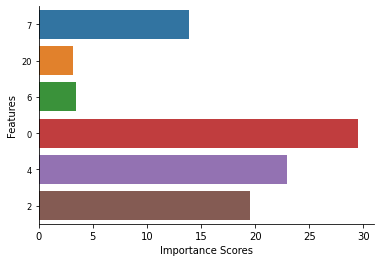

Score:  0.8714285714285714


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    1.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using ba

Markov Blanket:  [26, 21, 7, 6, 0, 2, 4]
Feature importance:  [11.216748103082358, 9.500176508006016, 4.829734767789766, 6.8224721629413185, 31.24807246708714, 19.53993654531005, 31.471693988168962]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


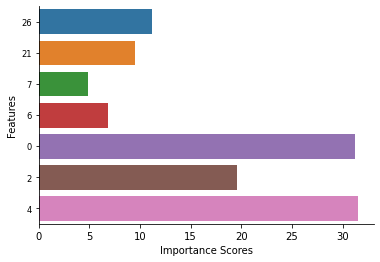

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Score:  0.8714285714285714


[Parallel(n_jobs=-1)]: Done  29 out of  34 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  34 out of  34 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50

Markov Blanket:  [7, 6, 0, 4, 2]
Feature importance:  [9.013598721866964, 11.45225380721348, 24.94158860164308, 8.032943942514862, 21.642048078936796]


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


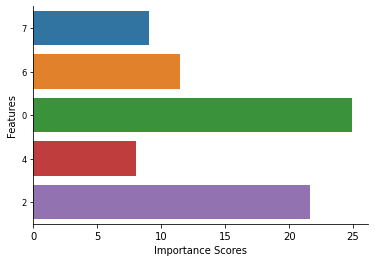

Score:  0.9285714285714286


Average Accuracy:  0.9031388329979879


Total Time Required (in seconds):  17.687098264694214


In [4]:
# We want to time our algorithm
start = time.time()
# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
# This will hold all the accuracy scores
scores = list()
# Perform CV
for train, test in kfold.split(data):
    # Split data into train and test based on folds
    x_train, x_test = data.iloc[train], data.iloc[test]
    y_train, y_test = Y[train], Y[test]

    # Create a PyImpetus classification object and initialize with required parameters
    # NOTE: To achieve fast selection, set cv=0 for disabling the use of any internal cross-validation
    model = PPIMBC(LogisticRegression(random_state=27), cv=0, num_simul=50, random_state=27, verbose=2)
    # Fit this above object on the train part and transform the train dataset into selected feature subset
    # NOTE: x_train has to be a dataframe and y_train has to be a numpy array
    x_train = model.fit_transform(x_train, y_train)
    # Transform the test set as well
    # NOTE: x_test has to be a dataframe
    x_test = model.transform(x_test)
    # Check out the features selected
    print("Markov Blanket: ", model.MB)
    # Check out the scores of each feature. The scores are in order of the selected feature list
    # NOTE: You can use these scores ina feature selection ensemble
    print("Feature importance: ", model.feat_imp_scores)
    # Plot the feature importance scores
    model.feature_importance()
    # Convert the data into numpy arrays
    x_train, x_test = x_train.values, x_test.values
    
    model = DecisionTreeClassifier(random_state=27)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print("Score: ", score)
# Compute average score
print("\n\nAverage Accuracy: ", sum(scores)/len(scores))
# Finally, check out the total time taken
end = time.time()
print("\n\nTotal Time Required (in seconds): ", end-start)

## Modelling with Decision Tree (slow but accurate feature subset selection)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   32.5s remaining:   32.5s


Markov Blanket:  [7, 0, 4, 6, 2]
Feature importance:  [14.237109289457631, 27.235206534666514, 9.016712999632158, 12.79106130463497, 12.599267345006794]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   34.1s finished


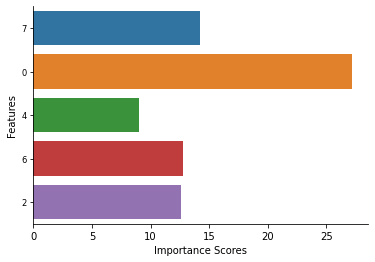

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Score:  0.9295774647887324


[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   34.5s remaining:   34.5s


Markov Blanket:  [7, 21, 6, 0, 4, 2]
Feature importance:  [3.7811512028459853, 7.907874774252947, 5.828727968164575, 23.47999593479633, 14.755531140670536, 26.853506520328565]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.9s finished


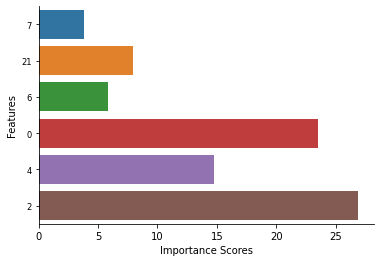

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Score:  0.9428571428571428


[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   35.2s remaining:   35.2s


Markov Blanket:  [7, 0, 6, 2, 4]
Feature importance:  [29.55315000107682, 35.30464122879052, 8.795807577523552, 16.22683599330686, 29.188670596866043]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.4s finished


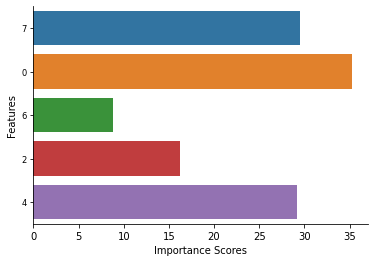

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Score:  0.8857142857142857


[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   33.4s remaining:   33.4s


Markov Blanket:  [7, 2, 0, 4]
Feature importance:  [3.685557472524493, 16.554609942925328, 39.726915592255985, 29.552709500487012]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   34.9s finished


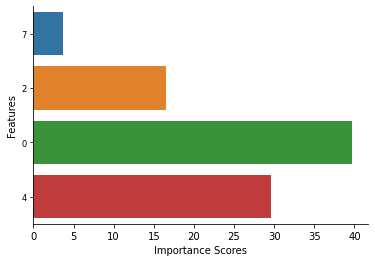

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Score:  0.8857142857142857


[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:   32.4s remaining:   32.4s


Markov Blanket:  [7, 0, 6, 4, 2]
Feature importance:  [4.37320698646105, 27.956168646591546, 16.5341321676295, 10.602750709754401, 27.549500392472215]


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   33.4s finished


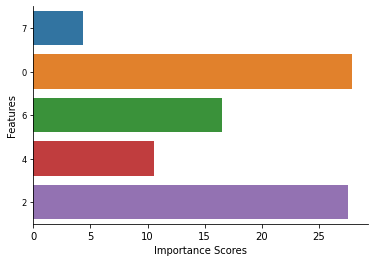

Score:  0.9428571428571428


Average Accuracy:  0.9173440643863179


Total Time Required (in seconds):  176.86153936386108


In [3]:
# We want to time our algorithm
start = time.time()
# Use KFold for understanding the performance of PyImpetus
kfold = KFold(n_splits=5, random_state=27, shuffle=True)
# This will hold all the accuracy scores
scores = list()
# Perform CV
for train, test in kfold.split(data):
    # Split data into train and test based on folds
    x_train, x_test = data.iloc[train], data.iloc[test]
    y_train, y_test = Y[train], Y[test]

    # Create a PyImpetus classification object and initialize with required parameters
    model = PPIMBC(LogisticRegression(random_state=27), cv=10, num_simul=50, random_state=27, verbose=2)
    # Fit this above object on the train part and transform the train dataset into selected feature subset
    # NOTE: x_train has to be a dataframe and y_train has to be a numpy array
    x_train = model.fit_transform(x_train, y_train)
    # Transform the test set as well
    # NOTE: x_test has to be a dataframe
    x_test = model.transform(x_test)
    # Check out the features selected
    print("Markov Blanket: ", model.MB)
    # Check out the scores of each feature. The scores are in order of the selected feature list
    # NOTE: You can use these scores ina feature selection ensemble
    print("Feature importance: ", model.feat_imp_scores)
    # Plot the feature importance scores
    model.feature_importance()
    # Convert the data into numpy arrays
    x_train, x_test = x_train.values, x_test.values
    
    model = DecisionTreeClassifier(random_state=27)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    scores.append(score)
    print("Score: ", score)
# Compute average score
print("\n\nAverage Accuracy: ", sum(scores)/len(scores))
# Finally, check out the total time taken
end = time.time()
print("\n\nTotal Time Required (in seconds): ", end-start)

# Final Results (Accuracy is used so more is better)

### Final Accuracy without PyImpetus: 0.8801 (0.033 seconds)
### Final Accuracy with PyImpetus (cv==0): 0.9031 (17.69 seconds)
### Final Accuracy with PyImpetus (cv!=0): 0.9173 (176.86 seconds)